# More NLP & Solving problems with ML

Imagine you work for a news agency, current articles are stored in a database in
a table where they are indexed by a unique identifier. A separate table indicates
the primary category for most articles, but some are missing. Your assignment is to create an automatic category generator to save editors time. Your manager suggests that
an SVM or decision tree is probably best, but is unsure what text representations
will perform best. You are expected to produce an accessible report with tables and plots that visualize the performance and impact of various modeling choices. 



Write the import statements you would need to solve this problem. Include
whole libraries or modules as is most appropriate.

```python 
import pandas as pd
import sqlite3
from sklearn.feature_extraction import text
from sklearn import tree
from sklearn import svm
from sklearn import model_selection
import seaborn as sns
```

Given the following vocabulary,

['and', 'are', 'cat', 'cats', 'dogs', 'pets', 'popular', 'videos']


represent "Cats and dogs are pets" in vector format.

[1,1,0,1,1,1,0,0]

In [1]:
from sklearn.feature_extraction import text
from sklearn.metrics.pairwise import euclidean_distances
from sklearn import datasets
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

# import a python utility for examingin ojbects for the notes
from sys import getsizeof
import numpy as np
import seaborn as sns
ng_X,ng_y = datasets.fetch_20newsgroups(categories =['comp.graphics','sci.crypt'],
                    return_X_y = True)

In [2]:
type(ng_y)

numpy.ndarray

In [3]:
ng_y[:5]

array([0, 0, 1, 0, 0])

In [4]:
ng_X[0]

"From: robert@cpuserver.acsc.com (Robert Grant)\nSubject: Virtual Reality for X on the CHEAP!\nOrganization: USCACSC, Los Angeles\nLines: 187\nDistribution: world\nReply-To: robert@cpuserver.acsc.com (Robert Grant)\nNNTP-Posting-Host: cpuserver.acsc.com\n\nHi everyone,\n\nI thought that some people may be interested in my VR\nsoftware on these groups:\n\n*******Announcing the release of Multiverse-1.0.2*******\n\nMultiverse is a multi-user, non-immersive, X-Windows based Virtual Reality\nsystem, primarily focused on entertainment/research.\n\nFeatures:\n\n   Client-Server based model, using Berkeley Sockets.\n   No limit to the number of users (apart from performance).\n   Generic clients.\n   Customizable servers.\n   Hierachical Objects (allowing attachment of cameras and light sources).\n   Multiple light sources (ambient, point and spot).\n   Objects can have extension code, to handle unique functionality, easily\n        attached.\n\nFunctionality:\n\n  Client:\n   The client is b

We're going to instantiate the object and fit it two the whole dataset.

In [5]:
count_vec = text.CountVectorizer()

count_vec.fit(ng_X)

CountVectorizer()

```{important}
I changed the following a little bit from class so that we can use the same test/train split for the two different types of transformation so that we can compare them more easily. 

This also helps illustrate when using the fit and transform separately is helpful. 
```

In [6]:
ng_X_train, ng_X_test, ng_y_train, ng_y_test = train_test_split(
                                        ng_X, ng_y, random_state=0)

Now, we can use the transformation that we fit to the whole dataset to transform the train and test portions of the data separately. 

The transform method also returns the sparse matrix directly so we no longer need the `toarray` method.

In [7]:
ng_vec_train = count_vec.transform(ng_X_train)
ng_vec_test = count_vec.transform(ng_X_test)

In [8]:
ng_vec_train[0]

<1x24257 sparse matrix of type '<class 'numpy.int64'>'
	with 84 stored elements in Compressed Sparse Row format>

In [9]:
clf = MultinomialNB()

In [10]:
clf.fit(ng_vec_train,ng_y_train).score(ng_vec_test,ng_y_test)

0.9830508474576272

In [11]:
tfidf = text.TfidfTransformer()
tfidf.fit_transform(ng_X)

ValueError: Expected 2D array, got 1D array instead:
array=["From: robert@cpuserver.acsc.com (Robert Grant)\nSubject: Virtual Reality for X on the CHEAP!\nOrganization: USCACSC, Los Angeles\nLines: 187\nDistribution: world\nReply-To: robert@cpuserver.acsc.com (Robert Grant)\nNNTP-Posting-Host: cpuserver.acsc.com\n\nHi everyone,\n\nI thought that some people may be interested in my VR\nsoftware on these groups:\n\n*******Announcing the release of Multiverse-1.0.2*******\n\nMultiverse is a multi-user, non-immersive, X-Windows based Virtual Reality\nsystem, primarily focused on entertainment/research.\n\nFeatures:\n\n   Client-Server based model, using Berkeley Sockets.\n   No limit to the number of users (apart from performance).\n   Generic clients.\n   Customizable servers.\n   Hierachical Objects (allowing attachment of cameras and light sources).\n   Multiple light sources (ambient, point and spot).\n   Objects can have extension code, to handle unique functionality, easily\n        attached.\n\nFunctionality:\n\n  Client:\n   The client is built around a 'fast' render loop. Basically it changes things\n   when told to by the server and then renders an image from the user's\n   viewpoint. It also provides the server with information about the user's\n   actions - which can then be communicated to other clients and therefore to\n   other users.\n\n   The client is designed to be generic - in other words you don't need to\n   develop a new client when you want to enter a new world. This means that\n   resources can be spent on enhancing the client software rather than adapting\n   it. The adaptations, as will be explained in a moment, occur in the servers.\n\n   This release of the client software supports the following functionality:\n\n    o Hierarchical Objects (with associated addressing)\n\n    o Multiple Light Sources and Types (Ambient, Point and Spot)\n\n    o User Interface Panels\n\n    o Colour Polygonal Rendering with Phong Shading (optional wireframe for\n\tfaster frame rates)\n\n    o Mouse and Keyboard Input\n\n   (Some people may be disappointed that this software doesn't support the\n   PowerGlove as an input device - this is not because it can't, but because\n   I don't have one! This will, however, be one of the first enhancements!)\n\n  Server(s):\n   This is where customization can take place. The following basic support is\n   provided in this release for potential world server developers:\n\n    o Transparent Client Management\n\n    o Client Message Handling\n\n   This may not sound like much, but it takes away the headache of\naccepting and\n   terminating clients and receiving messages from them - the\napplication writer\n   can work with the assumption that things are happening locally.\n\n   Things get more interesting in the object extension functionality. This is\n   what is provided to allow you to animate your objects:\n\n    o Server Selectable Extension Installation:\n        What this means is that you can decide which objects have extended\n        functionality in your world. Basically you call the extension\n        initialisers you want.\n\n    o Event Handler Registration:\n        When you develop extensions for an object you basically write callback\n        functions for the events that you want the object to respond to.\n        (Current events supported: INIT, MOVE, CHANGE, COLLIDE & TERMINATE)\n\n    o Collision Detection Registration:\n        If you want your object to respond to collision events just provide\n        some basic information to the collision detection management software.\n        Your callback will be activated when a collision occurs.\n\n    This software is kept separate from the worldServer applications because\n    the application developer wants to build a library of extended objects\n    from which to choose.\n\n    The following is all you need to make a World Server application:\n\n    o Provide an initWorld function:\n        This is where you choose what object extensions will be supported, plus\n        any initialization you want to do.\n\n    o Provide a positionObject function:\n        This is where you determine where to place a new client.\n\n    o Provide an installWorldObjects function:\n        This is where you load the world (.wld) file for a new client.\n\n    o Provide a getWorldType function:\n        This is where you tell a new client what persona they should have.\n\n    o Provide an animateWorld function:\n        This is where you can go wild! At a minimum you should let the objects\n        move (by calling a move function) and let the server sleep for a bit\n        (to avoid outrunning the clients).\n\n    That's all there is to it! And to prove it here are the line counts for the\n    three world servers I've provided:\n\n        generic - 81 lines\n        dactyl - 270 lines (more complicated collision detection due to the\n                           stairs! Will probably be improved with future\n                           versions)\n        dogfight - 72 lines\n\nLocation:\n\n   This software is located at the following site:\n   ftp.u.washington.edu\n\n   Directory:\n   pub/virtual-worlds\n\n   File:\n   multiverse-1.0.2.tar.Z\n\nFutures:\n\n   Client:\n\n    o Texture mapping.\n\n    o More realistic rendering: i.e. Z-Buffering (or similar), Gouraud shading\n\n    o HMD support.\n\n    o Etc, etc....\n\n   Server:\n\n    o Physical Modelling (gravity, friction etc).\n\n    o Enhanced Object Management/Interaction\n\n    o Etc, etc....\n\n   Both:\n\n    o Improved Comms!!!\n\nI hope this provides people with a good understanding of the Multiverse\nsoftware,\nunfortunately it comes with practically zero documentation, and I'm not sure\nwhether that will ever be able to be rectified! :-(\n\nI hope people enjoy this software and that it is useful in our explorations of\nthe Virtual Universe - I've certainly found fascinating developing it, and I\nwould *LOVE* to add support for the PowerGlove...and an HMD :-)!!\n\nFinally one major disclaimer:\n\nThis is totally amateur code. By that I mean there is no support for this code\nother than what I, out the kindness of my heart, or you, out of pure\ndesperation, provide. I cannot be held responsible for anything good or bad\nthat may happen through the use of this code - USE IT AT YOUR OWN RISK!\n\nDisclaimer over!\n\nOf course if you love it, I would like to here from you. And anyone with\nPOSITIVE contributions/criticisms is also encouraged to contact me. Anyone who\nhates it: > /dev/null!\n\n************************************************************************\n*********\nAnd if anyone wants to let me do this for a living: you know where to\nwrite :-)!\n************************************************************************\n*********\n\nThanks,\n\nRobert.\n\nrobert@acsc.com\n^^^^^^^^^^^^^^^\n"
 "From: lulagos@cipres.cec.uchile.cl (admirador)\nSubject: OAK VGA 1Mb. Please, I needd VESA TSR!!! 8^)\nOriginator: lulagos@cipres\nNntp-Posting-Host: cipres.cec.uchile.cl\nOrganization: Centro de Computacion (CEC), Universidad de Chile\nLines: 15\n\n\n\tHi there!...\n\t\tWell, i have a 386/40 with SVGA 1Mb. (OAK chip 077) and i don't\n\t\thave VESA TSR program for this card. I need it . \n\t\t\tPlease... if anybody can help me, mail me at:\n\t\t\tlulagos@araucaria.cec.uchile.cl\n\n\t\t\t\t\t\t\t\t\t\t\t\tThanks.\n\t\t\t\t\t\t\t\t\t\t\t\t\tMackk. \n   _   /| \n   \\'o.O' \n   =(___)=\n      U   \n     Ack!\n"
 'From: wcs@anchor.ho.att.com (Bill Stewart +1-908-949-0705)\nSubject: Re: Clipper considered harmful\nOrganization: Sorcerer\'s Apprentice Cleaning Services\nDistribution: inet\nIn-Reply-To: shirriff@sprite.berkeley.edu\'s message of 21 Apr 1993 00:36:44 GMT\nNntp-Posting-Host: rainier.ho.att.com\nLines: 24\n\nIn article <1r24us$oeh@agate.berkeley.edu> shirriff@sprite.berkeley.edu (Ken Shirriff) writes:\n   In article <15469@optilink.COM> brad@optilink.COM (Brad Yearwood) writes:\n   >Finally, because there is essentially no possibility of intercepting in\n   >realtime the scrutable content of communications between stolen instruments,\n   >there will exist strong motivation to record and archive _all_ communications\n   >in the network for ex-post-facto scrutiny (once some criminal act is\n   >discovered, and the instruments involved have been identified).\n\n"All" is a *very* big number.  The AT&T Long Distance network has\naround 20,000 T3 trunks (45 Mbit/sec), which is on the order of 10**12 bits/sec.\nThat doesn\'t even count the amount of traffic in the LOCAL phone companies,\nor our long-distance competitors.  It\'s about 200 Exabytes tapes / second,\nwhich is pretty large even for the NSA :-)\n\nOn the other hand, I can easily see them recording the traffic for\n"interesting" people, such as dissidents, suspected criminals,\nforeign telephone calls, and anybody noticed using encryption.\nAs Ken Shiriff speculates, recording encrypted traffic will probably\nbe judged not to be an invasion of privacy pretty soon ....\n--\n#\t\t\t\tPray for peace;      Bill\n# Bill Stewart 1-908-949-0705 wcs@anchor.att.com AT&T Bell Labs 4M312 Holmdel NJ\n#\t              No, I\'m *from* New Jersey, I only *work* in cyberspace....\n# White House Commect Line 1-202-456-1111  fax 1-202-456-2461\n'
 ...
 "From: gtoal@gtoal.com (Graham Toal)\nSubject: Re: PGP ideas for IBM systems\nLines: 7\n\n:    I've been thinking about how difficult it would be to make PGP available\n: in some form on EBCDIC machines.\n\nDon't encourage them.  Let EBCDIC machines die an honorable death :)\n\nG\n\n"
 "From: doug@hparc0.aus.hp.com (Doug Parsons)\nSubject: Re: 3d-Studio V2.01 : Any differences with previous version\nOrganization: HP Australasian Response Centre (Melbourne)\nX-Newsreader: TIN [version 1.1 PL8.5]\nLines: 10\n\nFOMBARON marc (fombaron@ufrima.imag.fr) wrote:\n: Are there significant differences between V2.01 and V2.00 ?\n: Thank you for helping\n\n\nNo.  As I recall, the only differences are in the 3ds.set parameters - some\nof the defaults have changed slightly.  I'll look when I get home and let\nyou know, but there isn't enough to actually warrant upgrading.\n\ndouginoz\n"
 'From: rboudrie@chpc.org (Rob Boudrie)\nSubject: Re: Once tapped, your code is no good any more.\nOrganization: Center For High Perf. Computing of WPI; Marlboro Ma\nDistribution: na\nLines: 26\n\nIn article <C5so84.Hxv@demon.co.uk> Graham Toal <gtoal@gtoal.com> writes:\n>In article <2073@rwing.UUCP> pat@rwing.UUCP (Pat Myrto) writes:\n>:If the Clinton Clipper is so very good, why not make its algrithm public\n>:so many people can exchange ideas and examine it, rather than a few\n>:isolated \'respected experts\' (respected by whom?  for what?  Perhaps a\n\nOne more time...\n\n    If they released the algorithm, it would be possible for someone\n    to come up with an implementation which was identical, but\n    lacking an escrowed key.\n\n    Note that the press announcement mentioned that the algorithm was\n    being kept secret for security of the key escrow system.  In this\n    case security means "an escrowed key for EVERY clipper chip".\n\n\n    Assuming you believed all that is said about the effective of\n    the algorithm, and the escrow system, which would you buy :\n\n     (a)  Chip from firm A with the escrowed key\n     (b)  Second source chip from reputable firm B with no key\n          in government escrow.\n\n    There would obviously be powerful economic incentives for a second\n    source, non escrowed, vendor.\n'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

We can to figure out why, we can compare what that method takes as input to what the count vectorizer takes as input. While working, the easiest way to do this is using the jupyter help (shift+tab, or ?) but for the notes, I'll print them out differently.

In [12]:
print('\n'.join(tfidf.fit.__doc__.split('\n')[:7]))

Learn the idf vector (global term weights).

        Parameters
        ----------
        X : sparse matrix of shape n_samples, n_features)
            A matrix of term/token counts.



In [13]:
print('\n'.join(count_vec.fit.__doc__.split('\n')[:7]))

Learn a vocabulary dictionary of all tokens in the raw documents.

        Parameters
        ----------
        raw_documents : iterable
            An iterable which generates either str, unicode or file objects.



We wanted the TfidfVectorizer, not the transformer, so that it accepts documents not features. We will again, instantiate the object and then fit on the whole dataset.

In [14]:
tfidf = text.TfidfVectorizer()

tfidf.fit(ng_X)

TfidfVectorizer()

We can see this works, because the code runs, but for completeness , we can also check the input again to compare with the above.

In [15]:
print('\n'.join(tfidf.fit.__doc__.split('\n')[:6]))

Learn vocabulary and idf from training set.

        Parameters
        ----------
        raw_documents : iterable
            An iterable which generates either str, unicode or file objects.


This now takes documents as we wanted. Since we split the data before transforming, we can then apply the new fit using the transform on the train/test splits.

In [16]:
ng_tfidf_train = tfidf.transform(ng_X_train)
ng_tfidf_test = tfidf.transform(ng_X_test)

Since these splits were made before we can use the same targets we used above.

In [17]:
clf.fit(ng_tfidf_train,ng_y_train).score(ng_tfidf_test,ng_y_test)

0.9288135593220339

## Comparing representations

To start, we will look at one element from each in order to compare them.

In [18]:
ng_tfidf_train[0]

<1x24257 sparse matrix of type '<class 'numpy.float64'>'
	with 84 stored elements in Compressed Sparse Row format>

In [19]:
ng_vec_train[0]

<1x24257 sparse matrix of type '<class 'numpy.int64'>'
	with 84 stored elements in Compressed Sparse Row format>

To start they both have 84 elements, since it is two different representations of the same document, that makes sense.  We can check a few others as well

In [20]:
ng_tfidf_train[1]

<1x24257 sparse matrix of type '<class 'numpy.float64'>'
	with 202 stored elements in Compressed Sparse Row format>

In [21]:
ng_vec_train[1]

<1x24257 sparse matrix of type '<class 'numpy.int64'>'
	with 202 stored elements in Compressed Sparse Row format>

In [22]:
(ng_vec_train[4]>0).sum() == (ng_tfidf_train[4]>0).sum()

True

Let's pick out a common word so that the calculation is meaningful and do the tfidf calucation. To find a common word in the dictionary, we'll first filter the vocabulary to keep only the words that occur at least 300 times in the training set. We sum along the columns of the matrix, transform it to an array, then iterate over the sum, enumerated (assigning the number to each element of the sum) and use that to get the word out, if its total is over 300.  I saw that this is actually a sort of long list, so I chose to only print out the first 25. We print them out with the index so we can use it for the one we choose.

In [23]:
[(count_vec.get_feature_names()[i],i) for i, n in 
         enumerate(np.asarray(ng_vec_train.sum(axis=0))[0])
 if n>300][:25]

/opt/hostedtoolcache/Python/3.8.13/x64/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


[('about', 3326),
 ('all', 3819),
 ('also', 3874),
 ('an', 3964),
 ('and', 4003),
 ('any', 4115),
 ('are', 4263),
 ('article', 4347),
 ('as', 4363),
 ('at', 4456),
 ('available', 4612),
 ('be', 4851),
 ('been', 4887),
 ('bit', 5096),
 ('but', 5582),
 ('by', 5605),
 ('can', 5779),
 ('chip', 6191),
 ('clipper', 6393),
 ('com', 6568),
 ('computer', 6786),
 ('could', 7180),
 ('cs', 7426),
 ('data', 7687),
 ('db', 7730)]

Let's use computer.

In [24]:
computer_idx = 6786
count_vec.get_feature_names()[computer_idx]

'computer'

In [25]:
ng_vec_train[:,computer_idx].toarray()[:10].T

array([[0, 0, 0, 5, 0, 0, 0, 0, 0, 0]])

In [26]:
ng_tfidf_train[:,computer_idx].toarray()[:10].T

array([[0.        , 0.        , 0.        , 0.06907742, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]])

So, we can see they have non zero elements in the same places, meaning that in both representations the column refers to the same thing. 

We can compare the untransformed to the count vectorizer:

In [27]:
len(ng_X_train[0].split())

100

In [28]:
ng_vec_train[0].sum()

100

We see that it is just a count of the number of total words, not unique words, but total

In [29]:
ng_tfidf_train[0].sum()

7.558255873996122

The tf-idf matrix, however is normalized to make the sums smaller. Each row is not the same, but it is more similar.

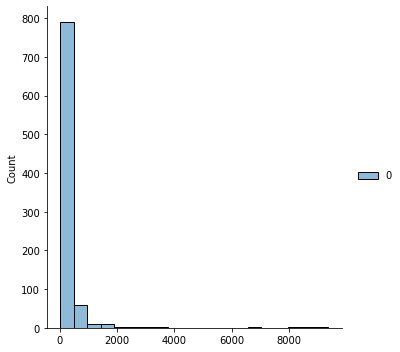

In [30]:
sns.displot(ng_vec_train.sum(axis=1),bins=20)

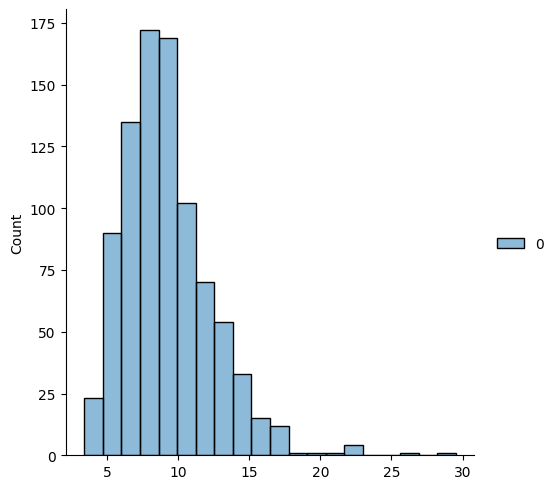

In [31]:
sns.displot(ng_tfidf_train.sum(axis=1),bins=20)

We can see that the `tf-idf` makes the totals across documents more spread out.

When we sum across words, we then get to see how

From the documentation we see that the idf is not exactly the inverse of the number of documents, it's also rescaled some. 

$$ idf = \log \frac{1 +n }{1 +df} + 1 $$

In this implementation, each row is the normalized as well, to keep them small, so that documents of different sizes are more comparable.  For example, if we return to what we did last week.

In [32]:
# %load http://drsmb.co/310read

# add an entry to the following dictionary with a name as the key and a sentence as the value
# share a sentence about how you're doing this week
# remember this will be python code, don't use
# You can remain anonymous (this page & the notes will be fully public)
# by attributing it to a celebrity or psuedonym, but include *some* sort of attribution
sentence_dict = {
'Professor Brown':"I'm excited for Thanksgiving.",
'Matt Langton':"I'm doing pretty good, I'll be taking the days off to catch up on various classwork.",
'Evan':"I'm just here so my grade doesn't get fined",
'Greg Bassett':"I'm doing well, my birthday is today. I'm looking forward to seeing my family this Thursday, I haven't seen a lot of them in a long time.",
'Noah N':"I'm doing well! I can't wait to take opportuity of this long weekend to catch up on various HW's, projects, etc.",
'Tuyetlinh':"I'm struggling to get all my work done before break, but I'm excited to have that time off when I'm all done.",
'Kenza Bouabdallah':"I am doing good. How are you ?",
'Chris Kerfoot':"I'm doing pretty good. I'm happy to have some days off this week because of Thanksgiving!",
'Kang Liu': "New week, new start",
'Aiden Hill':"I am very much enjoying this class.",
'Muhammad S':"I am doing pretty well. I am looking forward to taking a few days off.",
'Max Mastrorocco':"Cannot wait for a break.",
'Daniel':"I am doing well. I am ready and excited for break!",
'Nate':"I'm just vibing right now, ready for break ",
'Jacob':"I am going to eat Turkey.",
'Anon':"nom nom nom"
}
# create a new count vecorizer so that we can return to the news analysis
count_vec_ex = text.CountVectorizer()
tfidf_ex = text.TfidfVectorizer()
mat_c = count_vec_ex.fit_transform(sentence_dict.values()).toarray()
mat_t = tfidf_ex.fit_transform(sentence_dict.values()).toarray()
# sentence_df = pd.DataFrame(data = mat_c, 
#                            columns =counts.get_feature_names_out(),
#                           index=sentence_dict.keys())

dist_df_count = pd.DataFrame(data = euclidean_distances(mat_c),
            index= sentence_dict.keys(), columns= sentence_dict.keys())
dist_df_tfidf = pd.DataFrame(data = euclidean_distances(mat_t),
            index= sentence_dict.keys(), columns= sentence_dict.keys())

ref = 'Professor Brown'

In [33]:
count_closest = dist_df_count[ref].drop(ref).idxmin()
count_closest

'Max Mastrorocco'

In [34]:
tfidf_closest = dist_df_tfidf[ref].drop(ref).idxmin()
tfidf_closest

'Daniel'

In [35]:
sentence_dict[ref]

"I'm excited for Thanksgiving."

In [36]:
sentence_dict[count_closest]

'Cannot wait for a break.'

In [37]:
sentence_dict[tfidf_closest]

'I am doing well. I am ready and excited for break!'

Now, the closest sentence actually shares a wrod that's similar.

In [38]:
dist_df_count[ref].drop(ref).sort_values()

Max Mastrorocco      2.236068
Nate                 2.828427
Jacob                2.828427
Kenza Bouabdallah    3.000000
Kang Liu             3.000000
Aiden Hill           3.000000
Daniel               3.162278
Evan                 3.316625
Anon                 3.464102
Chris Kerfoot        3.872983
Muhammad S           4.123106
Matt Langton         4.242641
Noah N               4.898979
Tuyetlinh            5.099020
Greg Bassett         5.196152
Name: Professor Brown, dtype: float64

In [39]:
dist_df_tfidf[ref].drop(ref).sort_values()

Daniel               1.153404
Max Mastrorocco      1.248303
Chris Kerfoot        1.279299
Nate                 1.299060
Tuyetlinh            1.341626
Noah N               1.414214
Kenza Bouabdallah    1.414214
Aiden Hill           1.414214
Muhammad S           1.414214
Jacob                1.414214
Anon                 1.414214
Matt Langton         1.414214
Evan                 1.414214
Greg Bassett         1.414214
Kang Liu             1.414214
Name: Professor Brown, dtype: float64

Now, the distances are all much smaller and Chris who also talked about Thanksgiving is much higher on the list too.

In [40]:
mat_c.sum(axis=1)

array([ 3, 15,  8, 22, 19, 19,  6, 14,  4,  6, 12,  4,  9,  7,  5,  3])

In [41]:
mat_t.sum(axis=1)

array([1.72586983, 3.81967092, 2.81780765, 4.4761216 , 4.1953457 ,
       3.75971487, 2.39375957, 3.68712845, 1.61308516, 2.41468677,
       3.22271608, 1.97816206, 2.73725829, 2.62109557, 2.17780895,
       1.        ])

The sums are again much closer so the total length isn't as much of the signal. Since it's smaller, we can also sum along words.

In [42]:
sent_word_df = pd.DataFrame(data = count_vec_ex.get_feature_names(),
                           columns = ['word'])
sent_word_df['count_tot'] = mat_c.sum(axis=0)
sent_word_df['tfidf_tot'] = mat_t.sum(axis=0)
sent_word_df['doc_count'] = (mat_c>0).sum(axis=0)

/opt/hostedtoolcache/Python/3.8.13/x64/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [43]:
sent_word_df.sort_values(by='doc_count',ascending=False)

,word,count_tot,tfidf_tot,doc_count
73,to,9,1.513881,7
17,doing,7,1.326396,7
1,am,7,1.943291,5
51,off,4,0.860791,4
70,this,4,0.899345,4
...,...,...,...,...
32,happy,1,0.327365,1
31,grade,1,0.374658,1
29,going,1,0.517461,1
25,fined,1,0.374658,1


## Sparse Matrices

To understand the sparse matrices, we can examine the size of the objects as a sparse matrix and after exporting to array.

In [44]:
getsizeof(ng_vec_train[0])

48

In [45]:
getsizeof(ng_vec_train[0].toarray())

194184

This is another reason it is better to use the sparse matrices (as returned by `transform`, but not by `fit_transform`)

In [46]:
ng_tfidf_train[0].toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

## More Practice

1. On the sentence dataset, try implementing the tf-idf calculation.